In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from customScoringFunction import custom_score_func, custom_scorer

In [2]:
X_train = pd.read_csv("../../Data/feature_engineering/train_UI_U_allFeatures_multiclass.csv")
X_test = pd.read_csv("../../Data/feature_engineering/test_UI_U_allFeatures_multiclass.csv")

In [3]:
y_test = X_test['prediction']
X_test = X_test.drop('prediction', axis=1)

# Random under-sampling

In [4]:
amt0 = X_train[X_train['prediction'] == 0].shape[0]
amt1 = X_train[X_train['prediction'] == 1].shape[0]
amt2 = X_train[X_train['prediction'] == 2].shape[0]
amt3 = X_train[X_train['prediction'] == 3].shape[0]
amt4 = X_train[X_train['prediction'] == 4].shape[0]

amt_pos = amt1 + amt2 + amt3 + amt4

print(f'0:{amt0}\t\t1:{amt1}\t\t2:{amt2}\t\t3:{amt3}\t\t4:{amt4}')

df_0_under = X_train[X_train['prediction'] == 0].sample(amt_pos)


X_train_balanced = pd.concat([df_0_under, X_train.drop(X_train[X_train['prediction'] == 0].index)]).sample(frac=1)

X_train_balanced['prediction'].value_counts()

0:52782		1:2713		2:2580		3:2954		4:3214


0.0    11461
4.0     3214
3.0     2954
1.0     2713
2.0     2580
Name: prediction, dtype: int64

In [5]:
y_train_balanced = X_train_balanced['prediction']
X_train_balanced = X_train_balanced.drop('prediction', axis = 1)

In [12]:
forest = RandomForestClassifier()
params = {'criterion' : ['gini', 'entropy'], 
          'n_estimators' : np.arange(102, 107),
          'min_samples_split' : np.arange(2, 7),
          'max_depth' : np.arange(18, 23)}
clf = GridSearchCV(estimator=forest, param_grid=params, error_score='raise', n_jobs=-1)
clf.fit(X_train_balanced, y_train_balanced)
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_split': 3,
 'n_estimators': 102}

In [13]:
predictions = clf.predict(X_test)
validation = predictions - y_test

correct_pred_1 = predictions[validation == 0]
incorrect_pred_1 = predictions[validation != 0]

tp = correct_pred_1[correct_pred_1 != 0].shape[0]
fp = incorrect_pred_1[incorrect_pred_1 != 0].shape[0]

fn = incorrect_pred_1[incorrect_pred_1 == 0].shape[0]

print(f'Results for the undersampled random-forest:\n')
print(f'Accuracy:{correct_pred_1.shape[0] / predictions.shape[0] * 100 : .2f}%\tPrecision:{tp / (tp + fp) * 100 : .2f}%\tRecall:{tp / (tp + fn) * 100 : .2f}%   \tDMC-Score: {custom_score_func(predictions, y_test)}')

Results for the undersampled random-forest:

Accuracy: 79.97%	Precision: 25.07%	Recall: 16.12%   	DMC-Score: 24083


<AxesSubplot:>

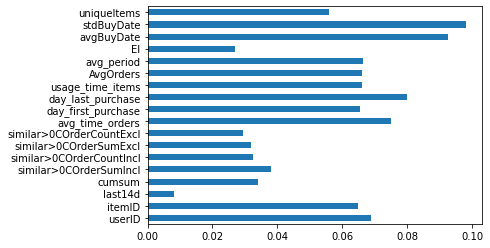

In [14]:
currently_best_estimator = clf.best_estimator_

(pd.Series(currently_best_estimator.feature_importances_, index=X_test.columns)
    .plot(kind='barh')) 

### Best results achieved with this balancing method <br>
__Accuracy:__ $79.97$% $\;\;\;\;$	__Precision:__ $25.07$% $\;\;\;\;$ __Recall:__ $16.12$% $\;\;\;\;$ __DMC-Score:__ $24083$


# Random over-sampling

In [15]:
amt0 = X_train[X_train['prediction'] == 0].shape[0]
amt1 = X_train[X_train['prediction'] == 1].shape[0]
amt2 = X_train[X_train['prediction'] == 2].shape[0]
amt3 = X_train[X_train['prediction'] == 3].shape[0]
amt4 = X_train[X_train['prediction'] == 4].shape[0]
amt_pos = amt1 + amt2 + amt3 + amt4

ratio1 = amt1 / amt_pos
ratio2 = amt2 / amt_pos
ratio3 = amt3 / amt_pos
ratio4 = amt4 / amt_pos

print(f'0:{amt0}\t\t1:{amt1}\t\t2:{amt2}\t\t3:{amt3}\t\t4:{amt4}')

df_1_under = X_train[X_train['prediction'] == 1].sample(round(ratio1 * amt0), replace=True)
df_2_under = X_train[X_train['prediction'] == 2].sample(round(ratio2 * amt0), replace=True)
df_3_under = X_train[X_train['prediction'] == 3].sample(round(ratio3 * amt0), replace=True)
df_4_under = X_train[X_train['prediction'] == 4].sample(round(ratio4 * amt0), replace=True)

X_train_balanced = pd.concat([df_1_under, df_2_under, df_3_under, df_4_under, X_train[X_train['prediction'] == 0]], axis=0)

X_train_balanced['prediction'].value_counts()

0:52782		1:2713		2:2580		3:2954		4:3214


0.0    52782
4.0    14802
3.0    13604
1.0    12494
2.0    11882
Name: prediction, dtype: int64

In [16]:
y_train_balanced = X_train_balanced['prediction']
X_train_balanced = X_train_balanced.drop('prediction', axis = 1)

In [24]:
params = {'criterion' : ['gini', 'entropy'], 
          'n_estimators' : np.arange(100, 105),
          'min_samples_split' : np.arange(2, 5),
          'max_depth' : np.arange(17, 22)}
clf = GridSearchCV(estimator=forest, param_grid=params, error_score='raise', n_jobs=-1)
clf.fit(X_train_balanced, y_train_balanced)
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 21,
 'min_samples_split': 2,
 'n_estimators': 104}

In [25]:
predictions = clf.predict(X_test)
validation = predictions - y_test

correct_pred_1 = predictions[validation == 0]
incorrect_pred_1 = predictions[validation != 0]

tp = correct_pred_1[correct_pred_1 != 0].shape[0]
fp = incorrect_pred_1[incorrect_pred_1 != 0].shape[0]

fn = incorrect_pred_1[incorrect_pred_1 == 0].shape[0]

print(f'Results for the oversampled random-forest:\n')
print(f'Accuracy:{correct_pred_1.shape[0] / predictions.shape[0] * 100 : .2f}%\tPrecision:{tp / (tp + fp) * 100 : .2f}%\tRecall:{tp / (tp + fn) * 100 : .2f}%   \tDMC-Score: {custom_score_func(predictions, y_test)}')

Results for the oversampled random-forest:

Accuracy: 82.45%	Precision: 40.52%	Recall: 7.70%   	DMC-Score: 23648


<AxesSubplot:>

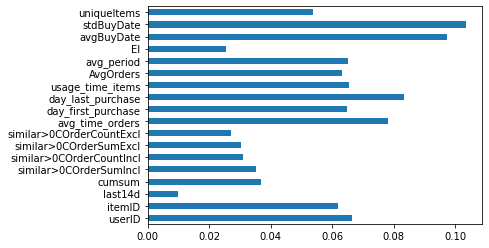

In [23]:
currently_best_estimator = clf.best_estimator_

(pd.Series(currently_best_estimator.feature_importances_, index=X_train_balanced.columns)
    .plot(kind='barh')) 

### Best results achieved with this balancing method <br>
__Accuracy:__ $82.21$% $\;\;\;\;$	__Precision:__ $34.15$% $\;\;\;\;$ __Recall:__ $8.24$% $\;\;\;\;$ __DMC-Score:__ $23730$


In [16]:
amt3 = X_test[X_test['prediction'] != 0].shape[0] 
amt1 = X_test[X_test['prediction'] == 0].shape[0]

max_points = 3 * amt3 + amt1

print(f'Best model: \t24083/37322 points\t{24083 / max_points * 100 : .2f}%')

Best model: 	24083/37322 points	 64.53%
